# California Housing Dataset Exploratory Data Analysis (EDA)

This notebook explores the **California Housing** dataset, a classic regression problem involving predicting the median house value for California districts based on eight features like median income, average house occupancy, and location coordinates.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## 1. Load Data and Initial Exploration

In [2]:
# Load data
def load_california_housing_data():
    data = fetch_california_housing()
    X, y = data.data, data.target
    feature_names = data.feature_names
    return X, y, feature_names

X, y, feature_names = load_california_housing_data()

print("=== CALIFORNIA HOUSING DATASET EXPLORATORY ANALYSIS ===")
print(f"Dataset shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {len(feature_names)}")
print(f"Features: {list(feature_names)}")
print(f"Problem type: Regression")

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['MedHouseVal'] = y

df.head(5)

=== CALIFORNIA HOUSING DATASET EXPLORATORY ANALYSIS ===
Dataset shape: (20640, 8)
Target shape: (20640,)
Number of features: 8
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Problem type: Regression


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 2. Basic Statistics and Missing Values

In [3]:
# Basic statistics
print("\n=== BASIC STATISTICS ===")
print("Features statistics:")
print(df[feature_names].describe())

print("\nTarget statistics:")
print(f"Mean: ${y.mean()*100000:.2f}")
print(f"Std: ${y.std()*100000:.2f}")
print(f"Min: ${y.min()*100000:.2f}")
print(f"Max: ${y.max()*100000:.2f}")
print(f"Median: ${np.median(y)*100000:.2f}")

# Check for missing values
print("\n=== MISSING VALUES ===")
print(f"Missing values in features: {df.isnull().sum().sum()}")
print(f"Missing values in target: {pd.isnull(y).sum()}")

# Check for infinite values
print("\n=== INFINITE VALUES ===")
print(f"Infinite values in features: {np.isinf(X).sum()}")
print(f"Infinite values in target: {np.isinf(y).sum()}")


=== BASIC STATISTICS ===
Features statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.

## 3. Target Distribution


=== TARGET DISTRIBUTION ===


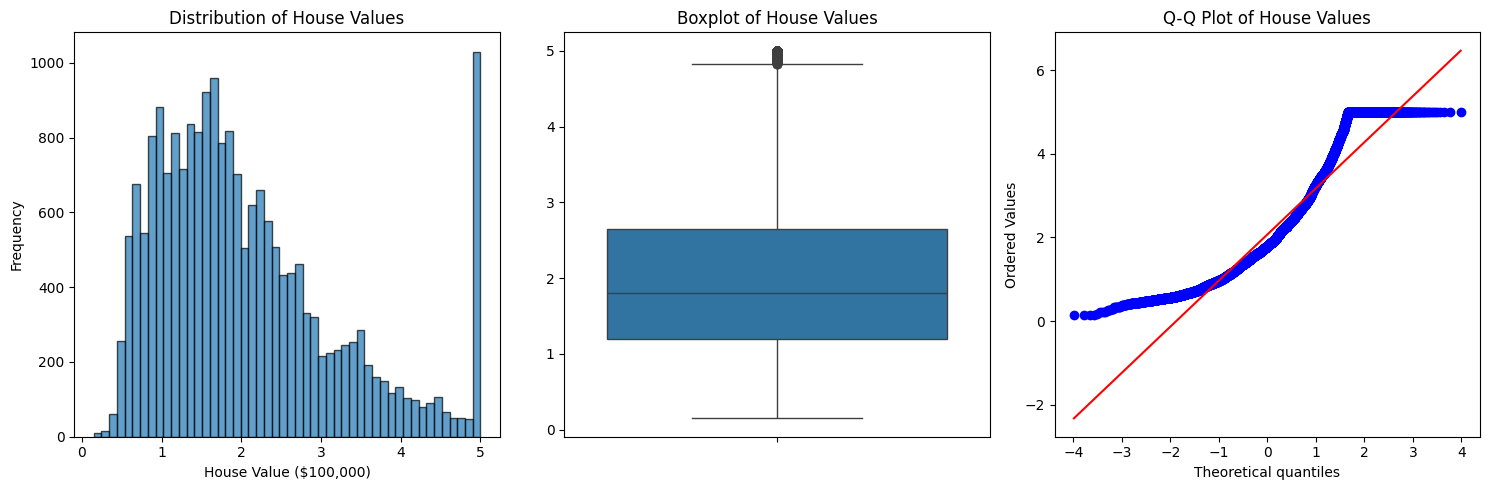

In [4]:
# Target distribution
print("\n=== TARGET DISTRIBUTION ===")
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(y, bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribution of House Values')
plt.xlabel('House Value ($100,000)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.boxplot(y=y)
plt.title('Boxplot of House Values')

plt.subplot(1, 3, 3)
stats.probplot(y, dist="norm", plot=plt)
plt.title('Q-Q Plot of House Values')

plt.tight_layout()
plt.show()

## 4. Feature Distributions and Outliers


=== FEATURE DISTRIBUTIONS ===


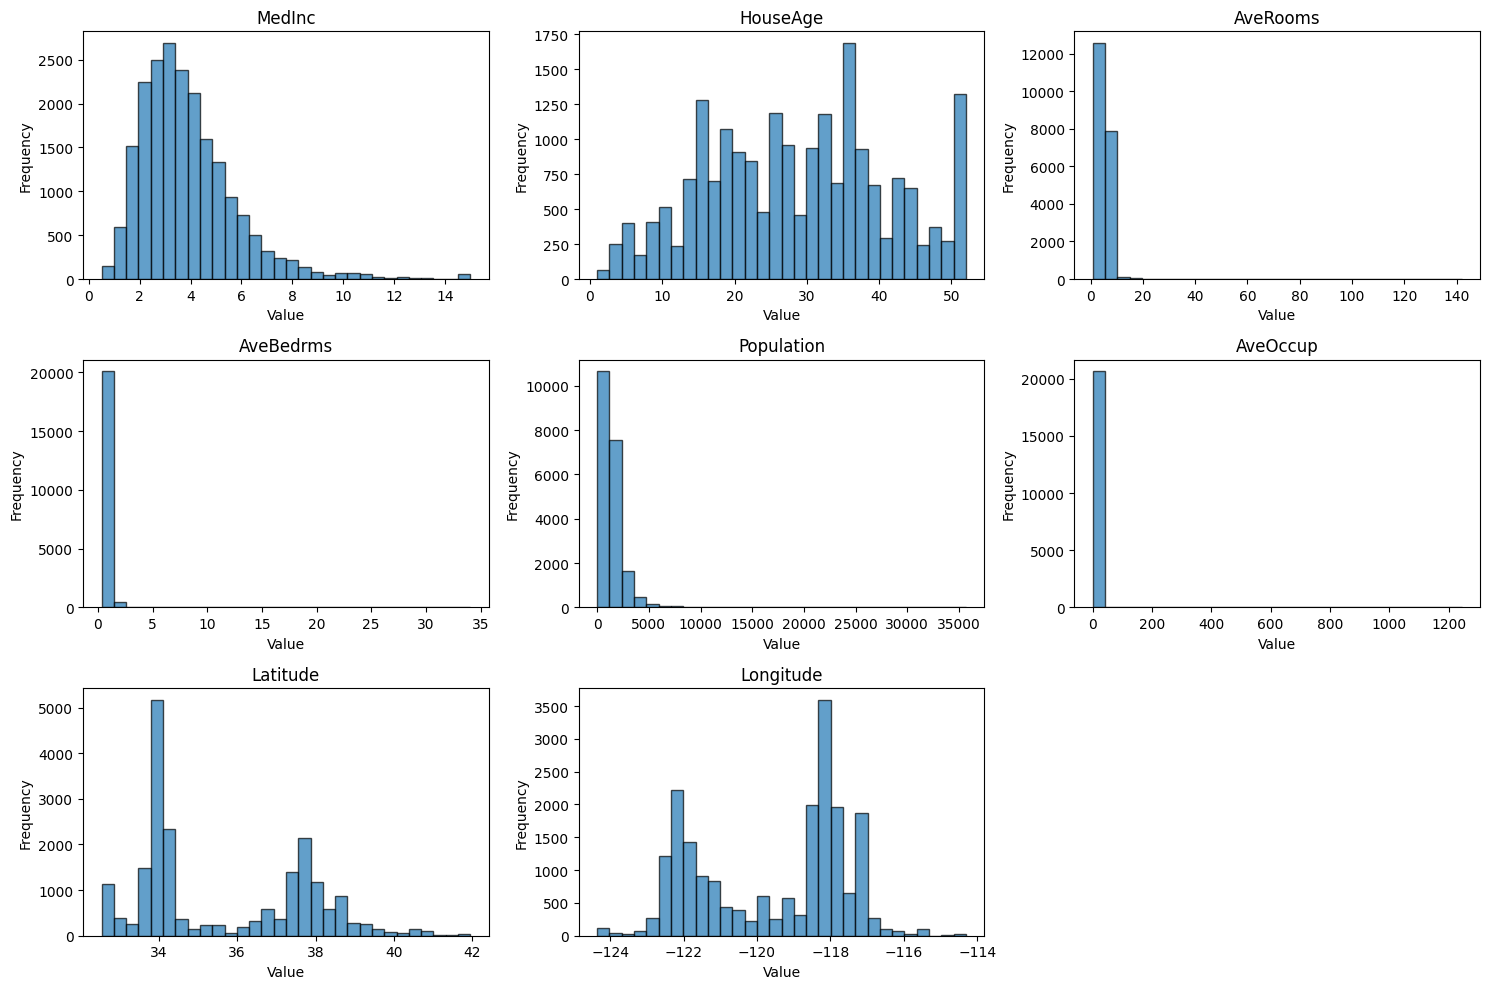


=== OUTLIER DETECTION ===


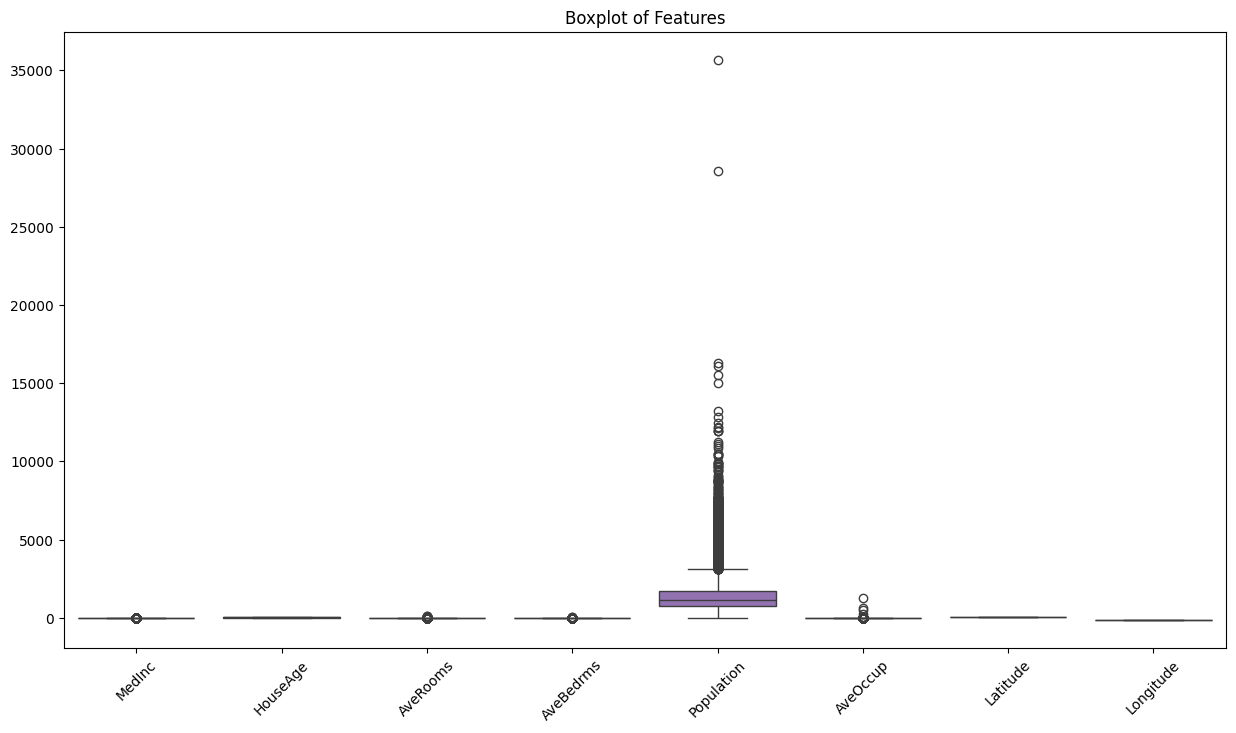

In [5]:
# Feature distributions
print("\n=== FEATURE DISTRIBUTIONS ===")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.hist(X[:, i], bins=30, alpha=0.7, edgecolor='black')
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Outlier detection
print("\n=== OUTLIER DETECTION ===")
plt.figure(figsize=(15, 8))
df_features = df.drop('MedHouseVal', axis=1)
sns.boxplot(data=df_features)
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()

## 5. Correlation Analysis


=== CORRELATION WITH TARGET ===
Correlation with target:
MedInc: 0.688
AveRooms: 0.152
HouseAge: 0.106
AveOccup: -0.024
Population: -0.025
Longitude: -0.046
AveBedrms: -0.047
Latitude: -0.144


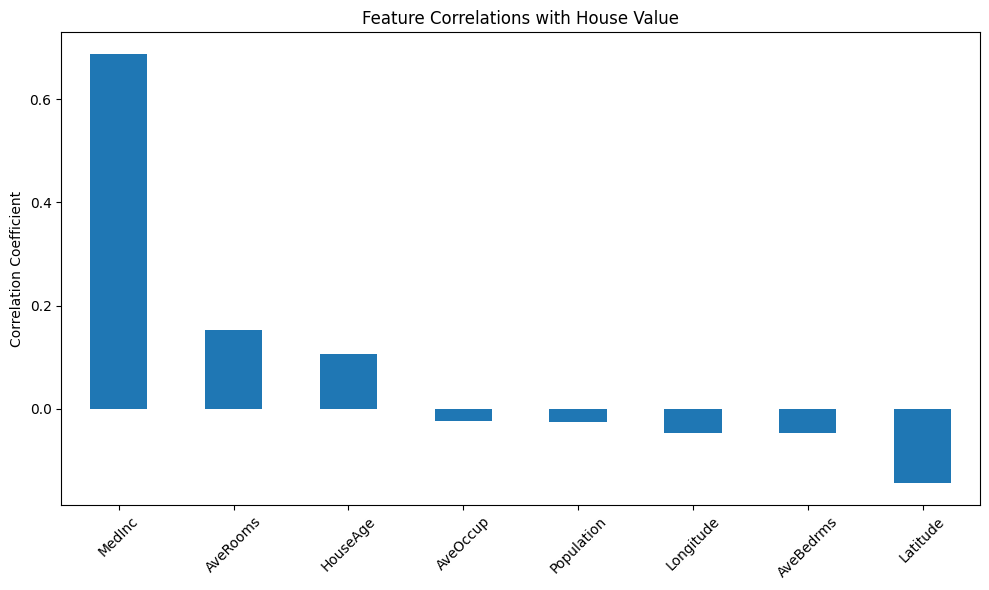


=== FEATURE CORRELATION MATRIX ===


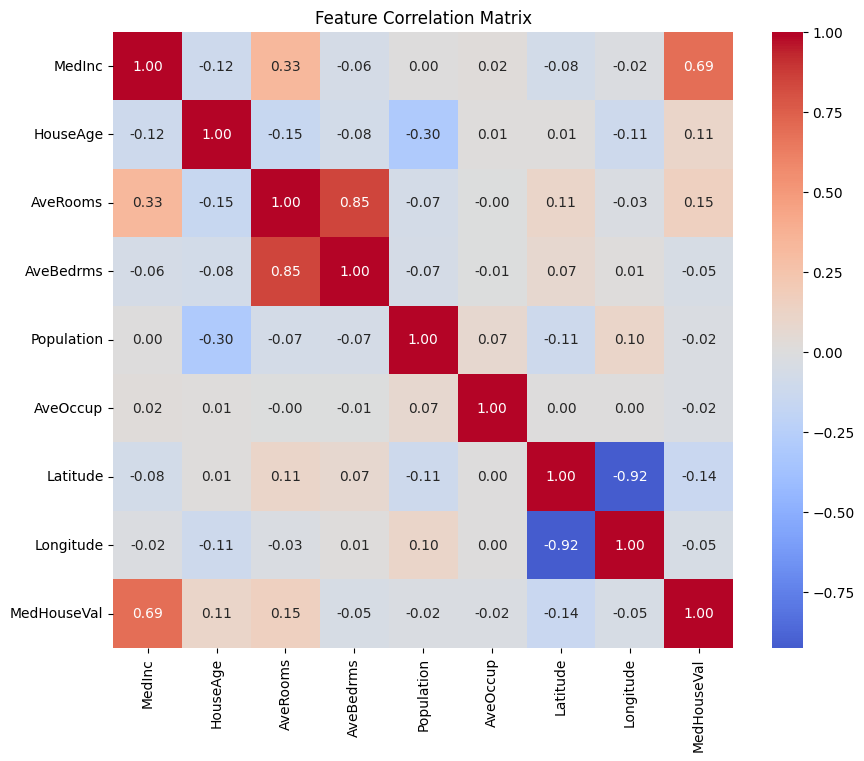

In [6]:
# Correlation with target
print("\n=== CORRELATION WITH TARGET ===")
correlations = df.corr()['MedHouseVal'].sort_values(ascending=False)
print("Correlation with target:")
for feature, corr in correlations.items():
    if feature != 'MedHouseVal':
        print(f"{feature}: {corr:.3f}")

plt.figure(figsize=(10, 6))
correlations.drop('MedHouseVal').plot(kind='bar')
plt.title('Feature Correlations with House Value')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation matrix
print("\n=== FEATURE CORRELATION MATRIX ===")
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()